**TUGAS MANDIRI 5 - AMAYA ESHIA - 0110224102 - DECISION TREE**

1. Pustaka Program Decision Tree

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns # Import seaborn

from sklearn.model_selection import train_test_split, cross_val_score # Import cross_val_score
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, LogisticRegression # Import LogisticRegression
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,
    confusion_matrix, classification_report, RocCurveDisplay, ConfusionMatrixDisplay
)
from sklearn.tree import DecisionTreeClassifier # Import DecisionTreeClassifier

In [2]:
# menghubungkan colab dengan google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


2. Loading Dataset

In [3]:
# MEmanggil dataset via gdrive
path = "/content/drive/MyDrive/Praktikum Machine Learning_Amaya Eshia_0110224102_Ai02/Praktikum 5/Data"

In [4]:
df = pd.read_csv('/content/drive/MyDrive/Praktikum Machine Learning_Amaya Eshia_0110224102_Ai02/Praktikum 5/Data/Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


3. Data Pre-Processing

In [7]:
# Cek Missing Value
df.isnull().sum()

,0
Id,0
SepalLengthCm,0
SepalWidthCm,0
PetalLengthCm,0
PetalWidthCm,0
Species,0


In [8]:
# Cek duplicate
df.duplicated().sum()

np.int64(0)

In [9]:
# Menghapus data duplikat
df = df.drop_duplicates()

In [10]:
# Cek duplikat ulang setelah menghapus
df.duplicated().sum()

np.int64(0)

In [11]:
df['Species'].value_counts()

,count
Species,
Iris-setosa,50
Iris-versicolor,50
Iris-virginica,50


In [12]:
df['Species'].value_counts(normalize=True) * 100

,proportion
Species,
Iris-setosa,33.333333
Iris-versicolor,33.333333
Iris-virginica,33.333333


4. Data Understanding (Exploratory Data Analysis)

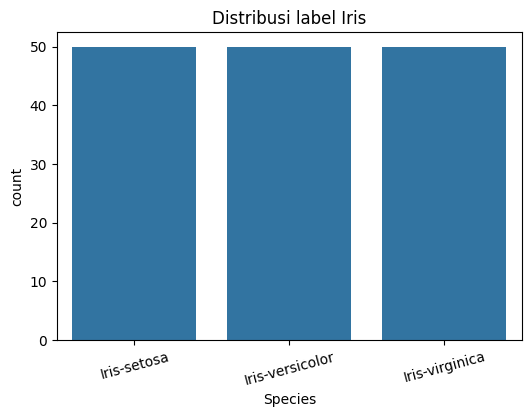

In [14]:
plt.figure(figsize=(6,4))
sns.countplot(x='Species', data=df)
plt.title('Distribusi label Iris')
plt.xticks(rotation=15)
plt.show()

5. Encoding Data Kategorikal (Mapping Label ke Kode Numerik)

In [15]:
from sklearn.preprocessing import LabelEncoder

# Diasumsikan 'df' adalah DataFrame yang sudah berisi data Iris.csv

# 1. Membuat objek LabelEncoder
label_encoder = LabelEncoder()

# 2. Mengubah kolom 'Species' menjadi numerik
# Metode fit_transform() akan mempelajari semua kategori unik
# lalu mengubahnya menjadi angka.
df['Species'] = label_encoder.fit_transform(df['Species'])

# 3. Menampilkan hasil mapping (pemetaan)
# Ini untuk melihat angka berapa yang mewakili spesies apa.
species_mapping = {index: label for index, label in enumerate(label_encoder.classes_)}
print("Hasil Mapping Species:")
print(species_mapping)

# 4. Menampilkan 5 baris pertama setelah encoding
print("\nDataFrame setelah Encoding:")
df.head()

Hasil Mapping Species:
{0: 'Iris-setosa', 1: 'Iris-versicolor', 2: 'Iris-virginica'}

DataFrame setelah Encoding:


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0


6. Analisis Korelasi Antar Fitur

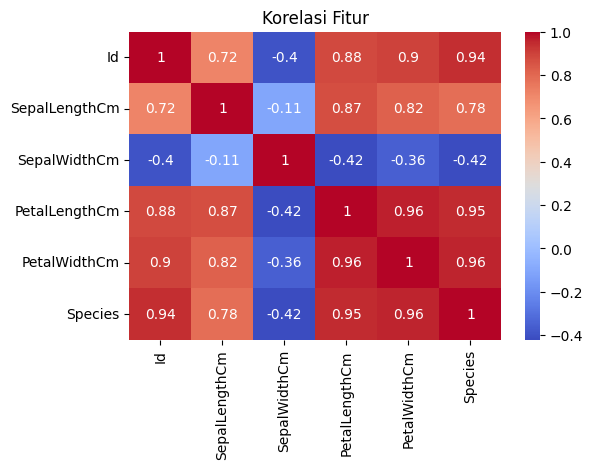

In [16]:
# Korelasi
plt.figure(figsize=(6,4))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Korelasi Fitur')
plt.show()

7. Splitting Data (Pembagian Data Training dan Testing)

In [17]:
# 1. Memilih Fitur (X) dan Target (y)
# =======================================

# Fitur (X) adalah semua kolom kecuali 'Species'. Ini adalah variabel independen.
X = df.drop('Species', axis=1)

# Target (y) adalah kolom 'Species'. Ini adalah variabel dependen yang ingin kita prediksi.
y = df['Species']

print("=== Fitur (X) ===")
print(X.head())
print("\n=== Target (y) ===")
print(y.head())

=== Fitur (X) ===
   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0   1            5.1           3.5            1.4           0.2
1   2            4.9           3.0            1.4           0.2
2   3            4.7           3.2            1.3           0.2
3   4            4.6           3.1            1.5           0.2
4   5            5.0           3.6            1.4           0.2

=== Target (y) ===
0    0
1    0
2    0
3    0
4    0
Name: Species, dtype: int64


In [18]:
# 2. Membagi Dataset menjadi Data Latih dan Data Uji
# ==================================================

# Kita bagi data menjadi 70% untuk training dan 30% untuk testing.
# random_state=42 digunakan agar hasil pembagian data selalu sama setiap kali kode dijalankan.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(f"\nUkuran data training (X_train): {X_train.shape}")
print(f"Ukuran data testing (X_test):  {X_test.shape}")


Ukuran data training (X_train): (105, 5)
Ukuran data testing (X_test):  (45, 5)


8. Pembuatan Model Decision Tree

In [22]:
# Membangun model
dt = DecisionTreeClassifier(
    criterion='gini',
    max_depth=4,
    random_state=42)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=42)

In [21]:
# Inisialisasi model Decision Tree Classifier.
# criterion='entropy' dan max_depth=4 adalah parameter untuk mengatur cara kerja pohon keputusan.
dt_model = DecisionTreeClassifier(criterion="entropy", max_depth=4, random_state=42)

# Melatih model menggunakan data training (X_train dan y_train).
# Proses ini adalah saat model "belajar" pola dari data.
dt_model.fit(X_train, y_train)

print("\nModel Decision Tree berhasil dilatih!")


Model Decision Tree berhasil dilatih!


9. Evaluasi Model Decision Tree

In [24]:
# Evaluasi
y_pred = dt.predict(X_test)
print("Akurasi:", round(accuracy_score(y_test, y_pred)*100, 2), "%")
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(
    y_test, y_pred, target_names=species_mapping.values()))

Akurasi: 100.0 %

Confusion Matrix:
 [[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]

Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        19
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00        13

       accuracy                           1.00        45
      macro avg       1.00      1.00      1.00        45
   weighted avg       1.00      1.00      1.00        45



10. Visualisasi Hasil Model Decision Tree

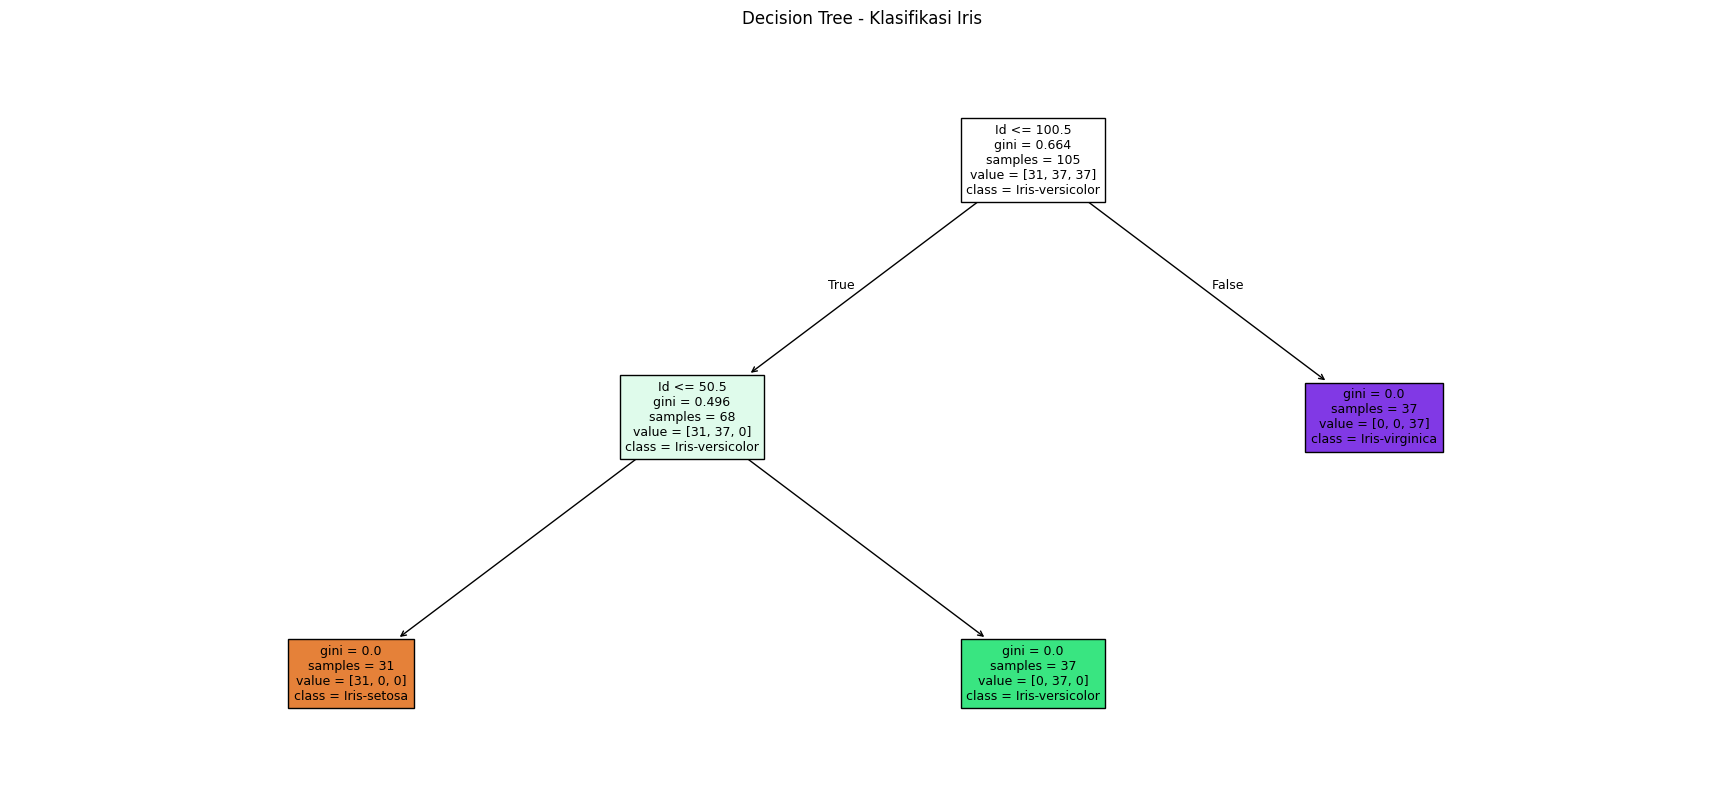

In [27]:
# Visualisasi Model
from sklearn.tree import plot_tree # Import plot_tree
plt.figure(figsize=(22, 10))
plot_tree(
    dt,
    feature_names=feature_cols,
    class_names=species_mapping.values, # kembali ke nama kelas asli
    filled=True,
    fontsize=9
)
plt.title('Decision Tree - Klasifikasi Iris')
plt.show() # Added parentheses to call the function

11. Feature Importance (Fitur yang Paling Berpengaruh)

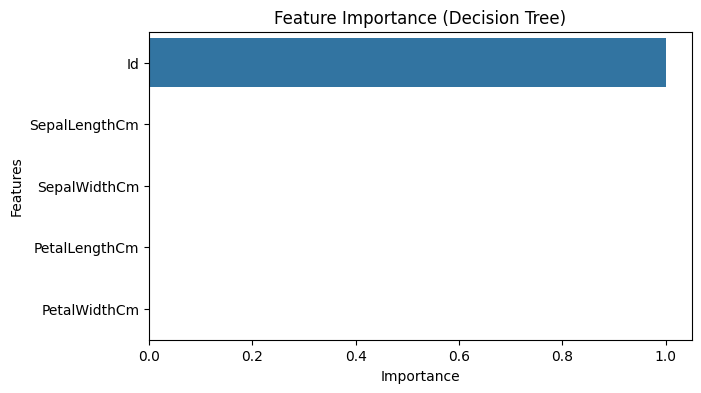

,0
Id,1.0
SepalLengthCm,0.0
SepalWidthCm,0.0
PetalLengthCm,0.0
PetalWidthCm,0.0


In [29]:
# Fitur yang penting

imp = pd.Series(dt.feature_importances_, index=feature_cols).sort_values(ascending=False)
plt.figure(figsize=(7,4))
sns.barplot(x=imp, y=imp.index)
plt.title("Feature Importance (Decision Tree)")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.show()

imp

12. Hyperparameter Tuning (Menentukan max_depth terbaik)

In [33]:
scores = {}
for d in range(2, 9):
  m = DecisionTreeClassifier(max_depth=d, random_state=42)
  m.fit(X_train, y_train)
  scores[d] = accuracy_score(y_test, m.predict(X_test))

print("Scores for different max_depth values:")
print(scores)

best_d = max(scores, key=scores.get)
print("Best max_depth:", best_d, "| Acc:", round(scores[best_d]*100,2), "%")

Scores for different max_depth values:
{2: 1.0, 3: 1.0, 4: 1.0, 5: 1.0, 6: 1.0, 7: 1.0, 8: 1.0}
Best max_depth: 2 | Acc: 100.0 %
